<a href="https://colab.research.google.com/github/anjha1/Project/blob/main/anjha_MACHINE_LEARNING_PROJECT_ON_EMPLOYEE_PERFORMANCE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Names :**EMPLOYEE PERFORMANCE ANALYSIS

**NAME :**  *Achhuta Nand Jha*

**Roll No :** 2315200002

**MACHINE LEARNING PROJECT ON EMPLOYEE PERFORMANCE ANALYSIS**

**BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE**

**IMPORTING THE NECESSAERY LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats

# TO avoid warnings
import warnings
warnings.filterwarnings('ignore')

**READING DATA FOR VISUALIZATION:**

In [ ]:
data = pd.read_csv('Employee_Performance.csv')
pd.set_option('display.max_columns',None)

**BASIC CHECKS OF DATA**

In [ ]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
1,E1001025,30,Male,Marketing,Divorced,Sales,Sales Executive,Travel_Rarely,27,5,3,99,3,2,4,7,No,23,4,10,2,2,8,7,7,7,No,4
2,E1001054,52,Male,Marketing,Married,Sales,Manager,Travel_Rarely,3,4,3,31,2,4,1,1,No,11,1,34,3,4,34,6,1,16,No,4
3,E1001059,25,Female,Medical,Single,Sales,Sales Executive,Travel_Rarely,26,1,3,32,3,2,4,1,No,23,2,6,5,2,6,5,1,4,No,4
4,E1001064,34,Male,Other,Single,Sales,Sales Executive,Travel_Rarely,2,3,4,60,3,2,4,1,No,22,3,6,5,3,6,5,1,4,No,4


In [ ]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
81,E100724,33,Male,Marketing,Single,Sales,Sales Executive,Travel_Frequently,10,3,2,46,2,2,4,3,No,14,3,9,6,2,7,7,0,1,No,4
82,E100891,31,Male,Life Sciences,Divorced,Sales,Manager,Travel_Rarely,7,3,3,44,2,3,4,9,No,21,3,10,3,2,5,4,0,1,No,4
83,E100985,25,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,8,3,4,57,4,2,2,0,No,22,3,4,4,3,3,2,1,2,No,4
84,E100987,38,Female,Marketing,Single,Sales,Sales Executive,Travel_Rarely,7,4,4,46,2,2,4,0,No,20,1,8,2,3,7,7,0,5,No,4
85,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4


In [ ]:
data.shape

(86, 28)

In [ ]:
data.size

2408

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     86 non-null     object
 1   Age                           86 non-null     int64 
 2   Gender                        86 non-null     object
 3   EducationBackground           86 non-null     object
 4   MaritalStatus                 86 non-null     object
 5   EmpDepartment                 86 non-null     object
 6   EmpJobRole                    86 non-null     object
 7   BusinessTravelFrequency       86 non-null     object
 8   DistanceFromHome              86 non-null     int64 
 9   EmpEducationLevel             86 non-null     int64 
 10  EmpEnvironmentSatisfaction    86 non-null     int64 
 11  EmpHourlyRate                 86 non-null     int64 
 12  EmpJobInvolvement             86 non-null     int64 
 13  EmpJobLevel           

In [ ]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

**STATISTICAL ANALYSIS OF NUMERICAL FEATURE**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,86.0,37.209302,9.577076,18.0,31.0,37.0,43.00,60.0
DistanceFromHome,86.0,8.918605,8.569735,1.0,2.0,6.5,12.00,29.0
EmpEducationLevel,86.0,2.906977,1.047438,1.0,2.0,3.0,4.00,5.0
EmpEnvironmentSatisfaction,86.0,3.151163,0.926949,1.0,3.0,3.0,4.00,4.0
EmpHourlyRate,86.0,65.023256,20.841123,30.0,46.0,67.5,79.00,100.0
EmpJobInvolvement,86.0,2.662791,0.729391,1.0,2.0,3.0,3.00,4.0
EmpJobLevel,86.0,2.197674,1.166390,1.0,1.0,2.0,3.00,5.0
EmpJobSatisfaction,86.0,2.720930,1.233371,1.0,1.0,3.0,4.00,4.0
NumCompaniesWorked,86.0,2.837209,2.310388,0.0,1.0,2.0,4.00,9.0
EmpLastSalaryHikePercent,86.0,20.604651,3.330003,11.0,20.0,21.0,22.75,25.0


**STATISTICAL ANALYSIS OF CATEGORICAL FEATURE**

In [ ]:
data.describe(include='O').T

,count,unique,top,freq
EmpNumber,86,86,E1001007,1
Gender,86,2,Male,53
EducationBackground,86,6,Life Sciences,35
MaritalStatus,86,3,Married,36
EmpDepartment,86,4,Research & Development,41
EmpJobRole,86,12,Sales Executive,25
BusinessTravelFrequency,86,3,Travel_Rarely,53
OverTime,86,2,No,62
Attrition,86,2,No,75


**UNIVARIATE ANALYSIS**

**1.Age**

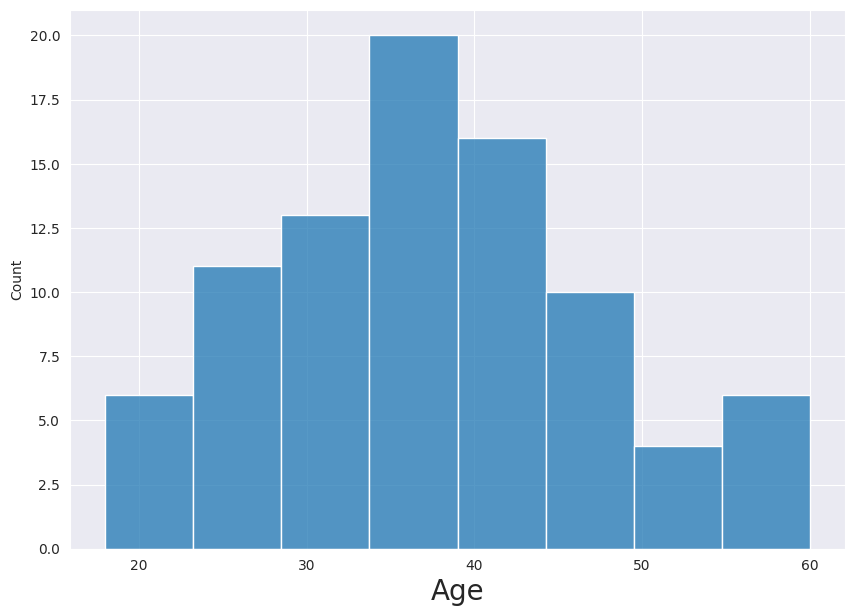

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=data)
plt.xlabel('Age',fontsize=20)
plt.show()

**Observation**:

* The range of age between 18 to 60, most of the employee age between 25 to 40.

**2.Employee Hourly Rate**

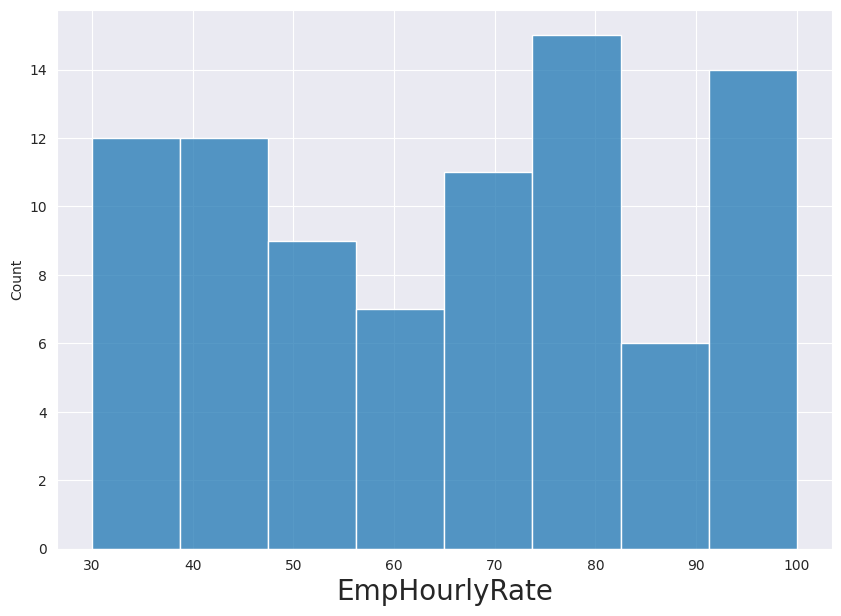

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x='EmpHourlyRate',data=data)
plt.xlabel('EmpHourlyRate',fontsize=20)
plt.show()

**Observation:** The range of employee hourly rate between 30 to 100, most of the employee hourly rate is 45

**3.Total Work Experience In Year**

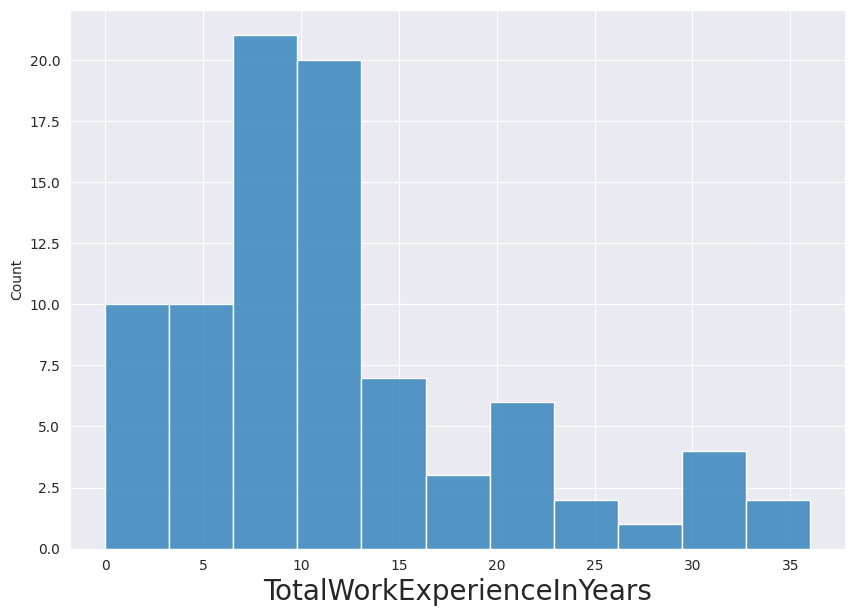

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x='TotalWorkExperienceInYears',data=data)
plt.xlabel('TotalWorkExperienceInYears',fontsize=20)
plt.show()

**Observation:** Work experiance range between 0 to 40,Most of the employee experiance ranges between 5 to 10.

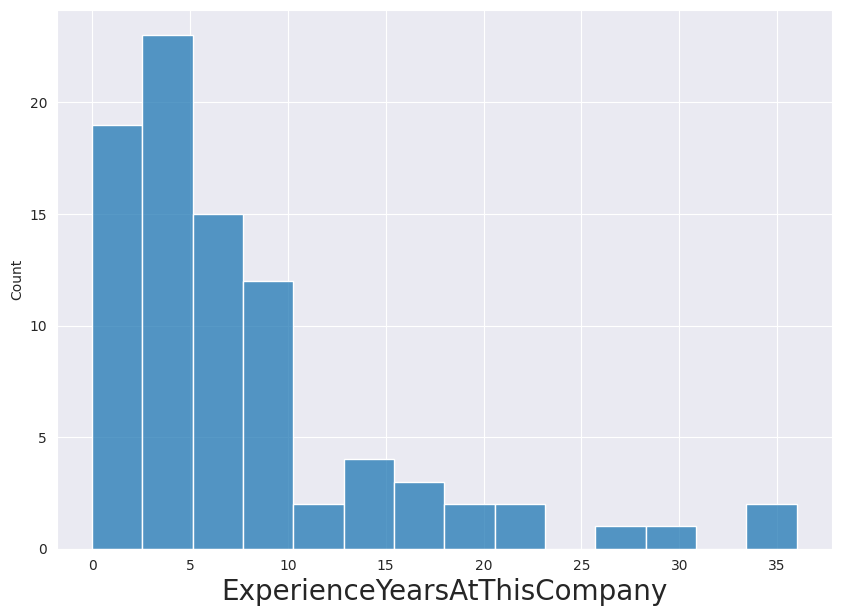

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(x='ExperienceYearsAtThisCompany',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=20)
plt.show()

**Observation:** The Range of experiance in same comapny is 0 to 40,most of the employee join between 0 to 5.


**USE SUBPLOT TO PLOTS MULTIPLE FEATURE**

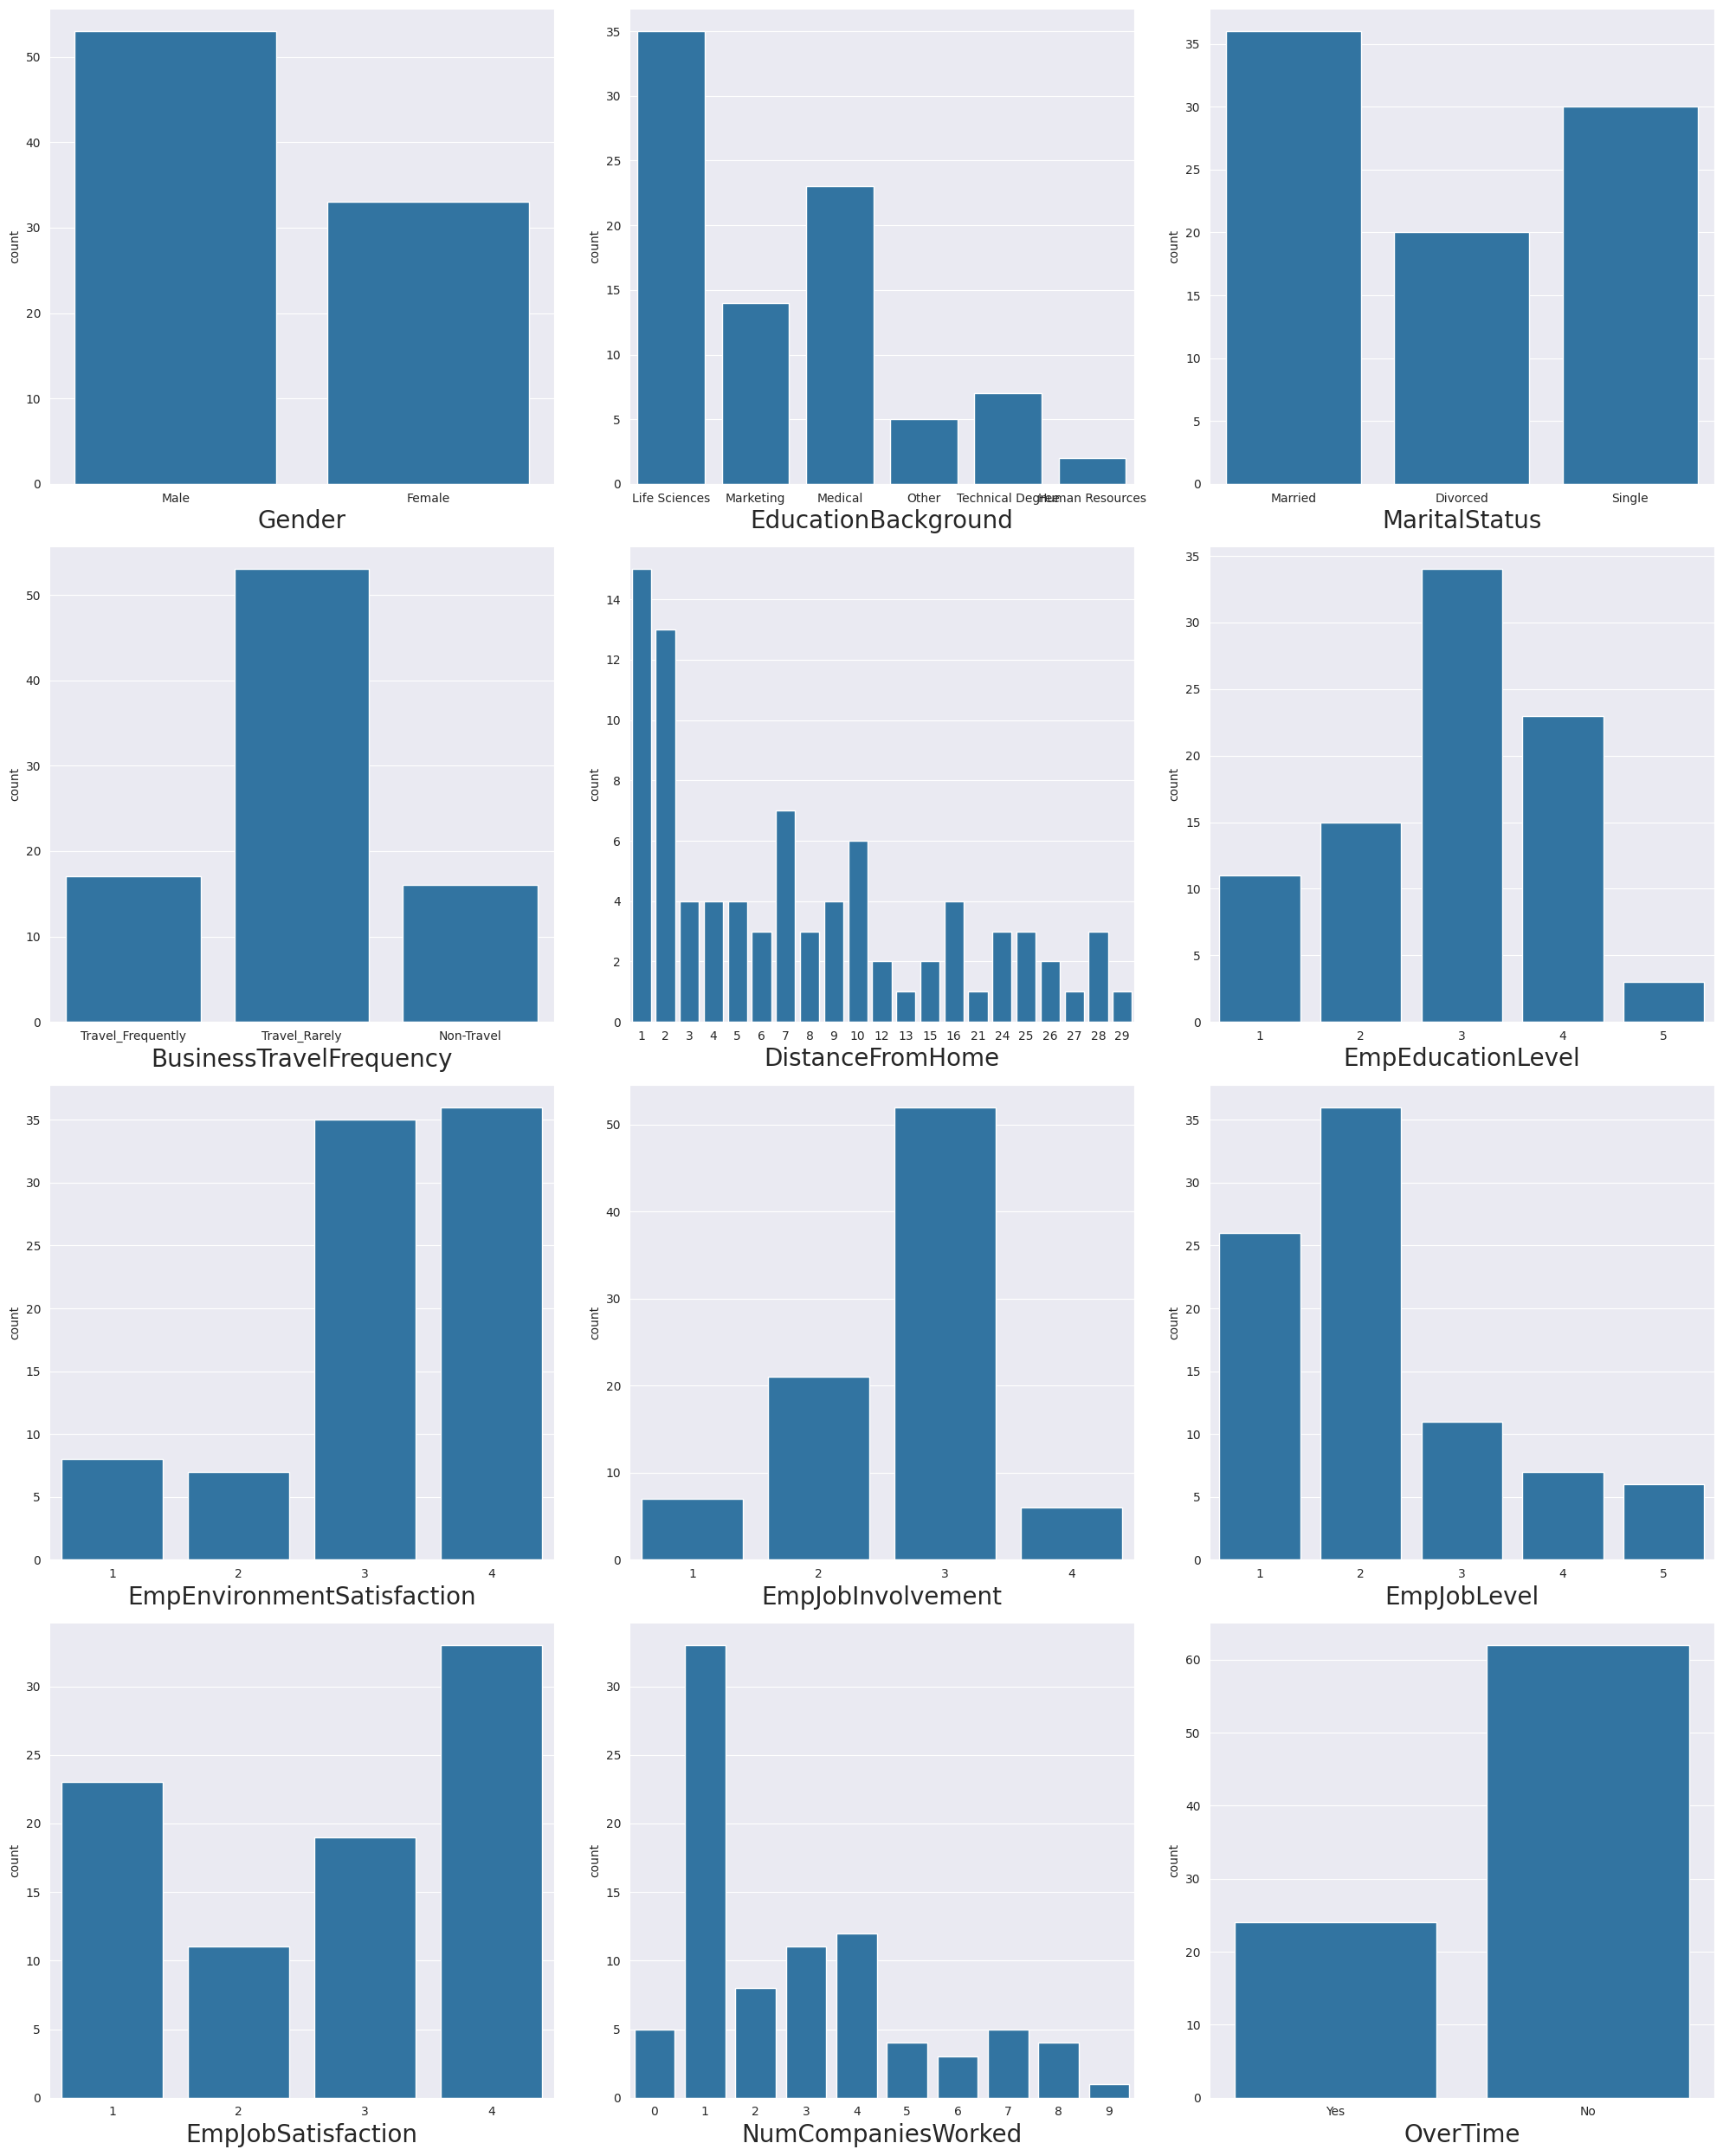

In [ ]:
count = data[['Gender', 'EducationBackground', 'MaritalStatus','BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in count: # iteration of columns / acessing the columns from count
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

**Observation:**
**5.Gender:**

* Most of the male present in the comapany

**6.Education Background:**

* most of the education background of employee is Life science and medical, as well as marketing eduaction background employee is more than 100.
* other eduacation background employee is less than 100.

**7.MaritalStatus:**

* Most of the employee is married as well as less than 400 employee is single.
* less than 300 employee mariatal status is divorced.

**8.Business Travel Frequency:**

* Maximum no of employee travel rarely for company buisness purpose,less than * 220 employee travel frequently
* remaining less than 120 employee not travell for buisness purpose.

**9.Distance From Home:**

* The range of distance between home to comapny is 1 to 29.
* Maximum no of employee home to company distance is less than 10.

**10.Educational Level:**

* Total range of educational level is 1 to 5,Maximum no of employee education level is 3 & 4.
* 2 education level employee is less than 250 and remianing 1 & 5 education level employee is less than 150.

**11.Employee Environment Satisfaction:**

* Most of the employee Statisfaction is 3 & 4
* 1 & 2 enviroment satisfaction employee less than 250

**12.Employee Job Involvement:**

* Most of the employee job involvement is 3 as well as 2 job involment employee is less than 300.
* Remaining 1 and 4 job involvment employee is less than 100.

**13.Employee Job Level:**

* The range of employee job kevel is 1 to 5,most of the employee job level is 1 & 2.
* Minimum no of job level is 5, as well as 3 & 4 job level employee is less than 180.

**14.Employee Job Satisfaction:**

* Most of the employee job satisfaction is 3 & 4 score as well as 1 & 2 score jon satisfaction employee is less than 250.

**15.Number Companies Worked:**

* Maximum no of employee work with only one company.
* less no of employee work in more than 5 companies.

**16.Overtime:**

* Most no of employee on doing over time and less than 350 employee doing overtime in company.

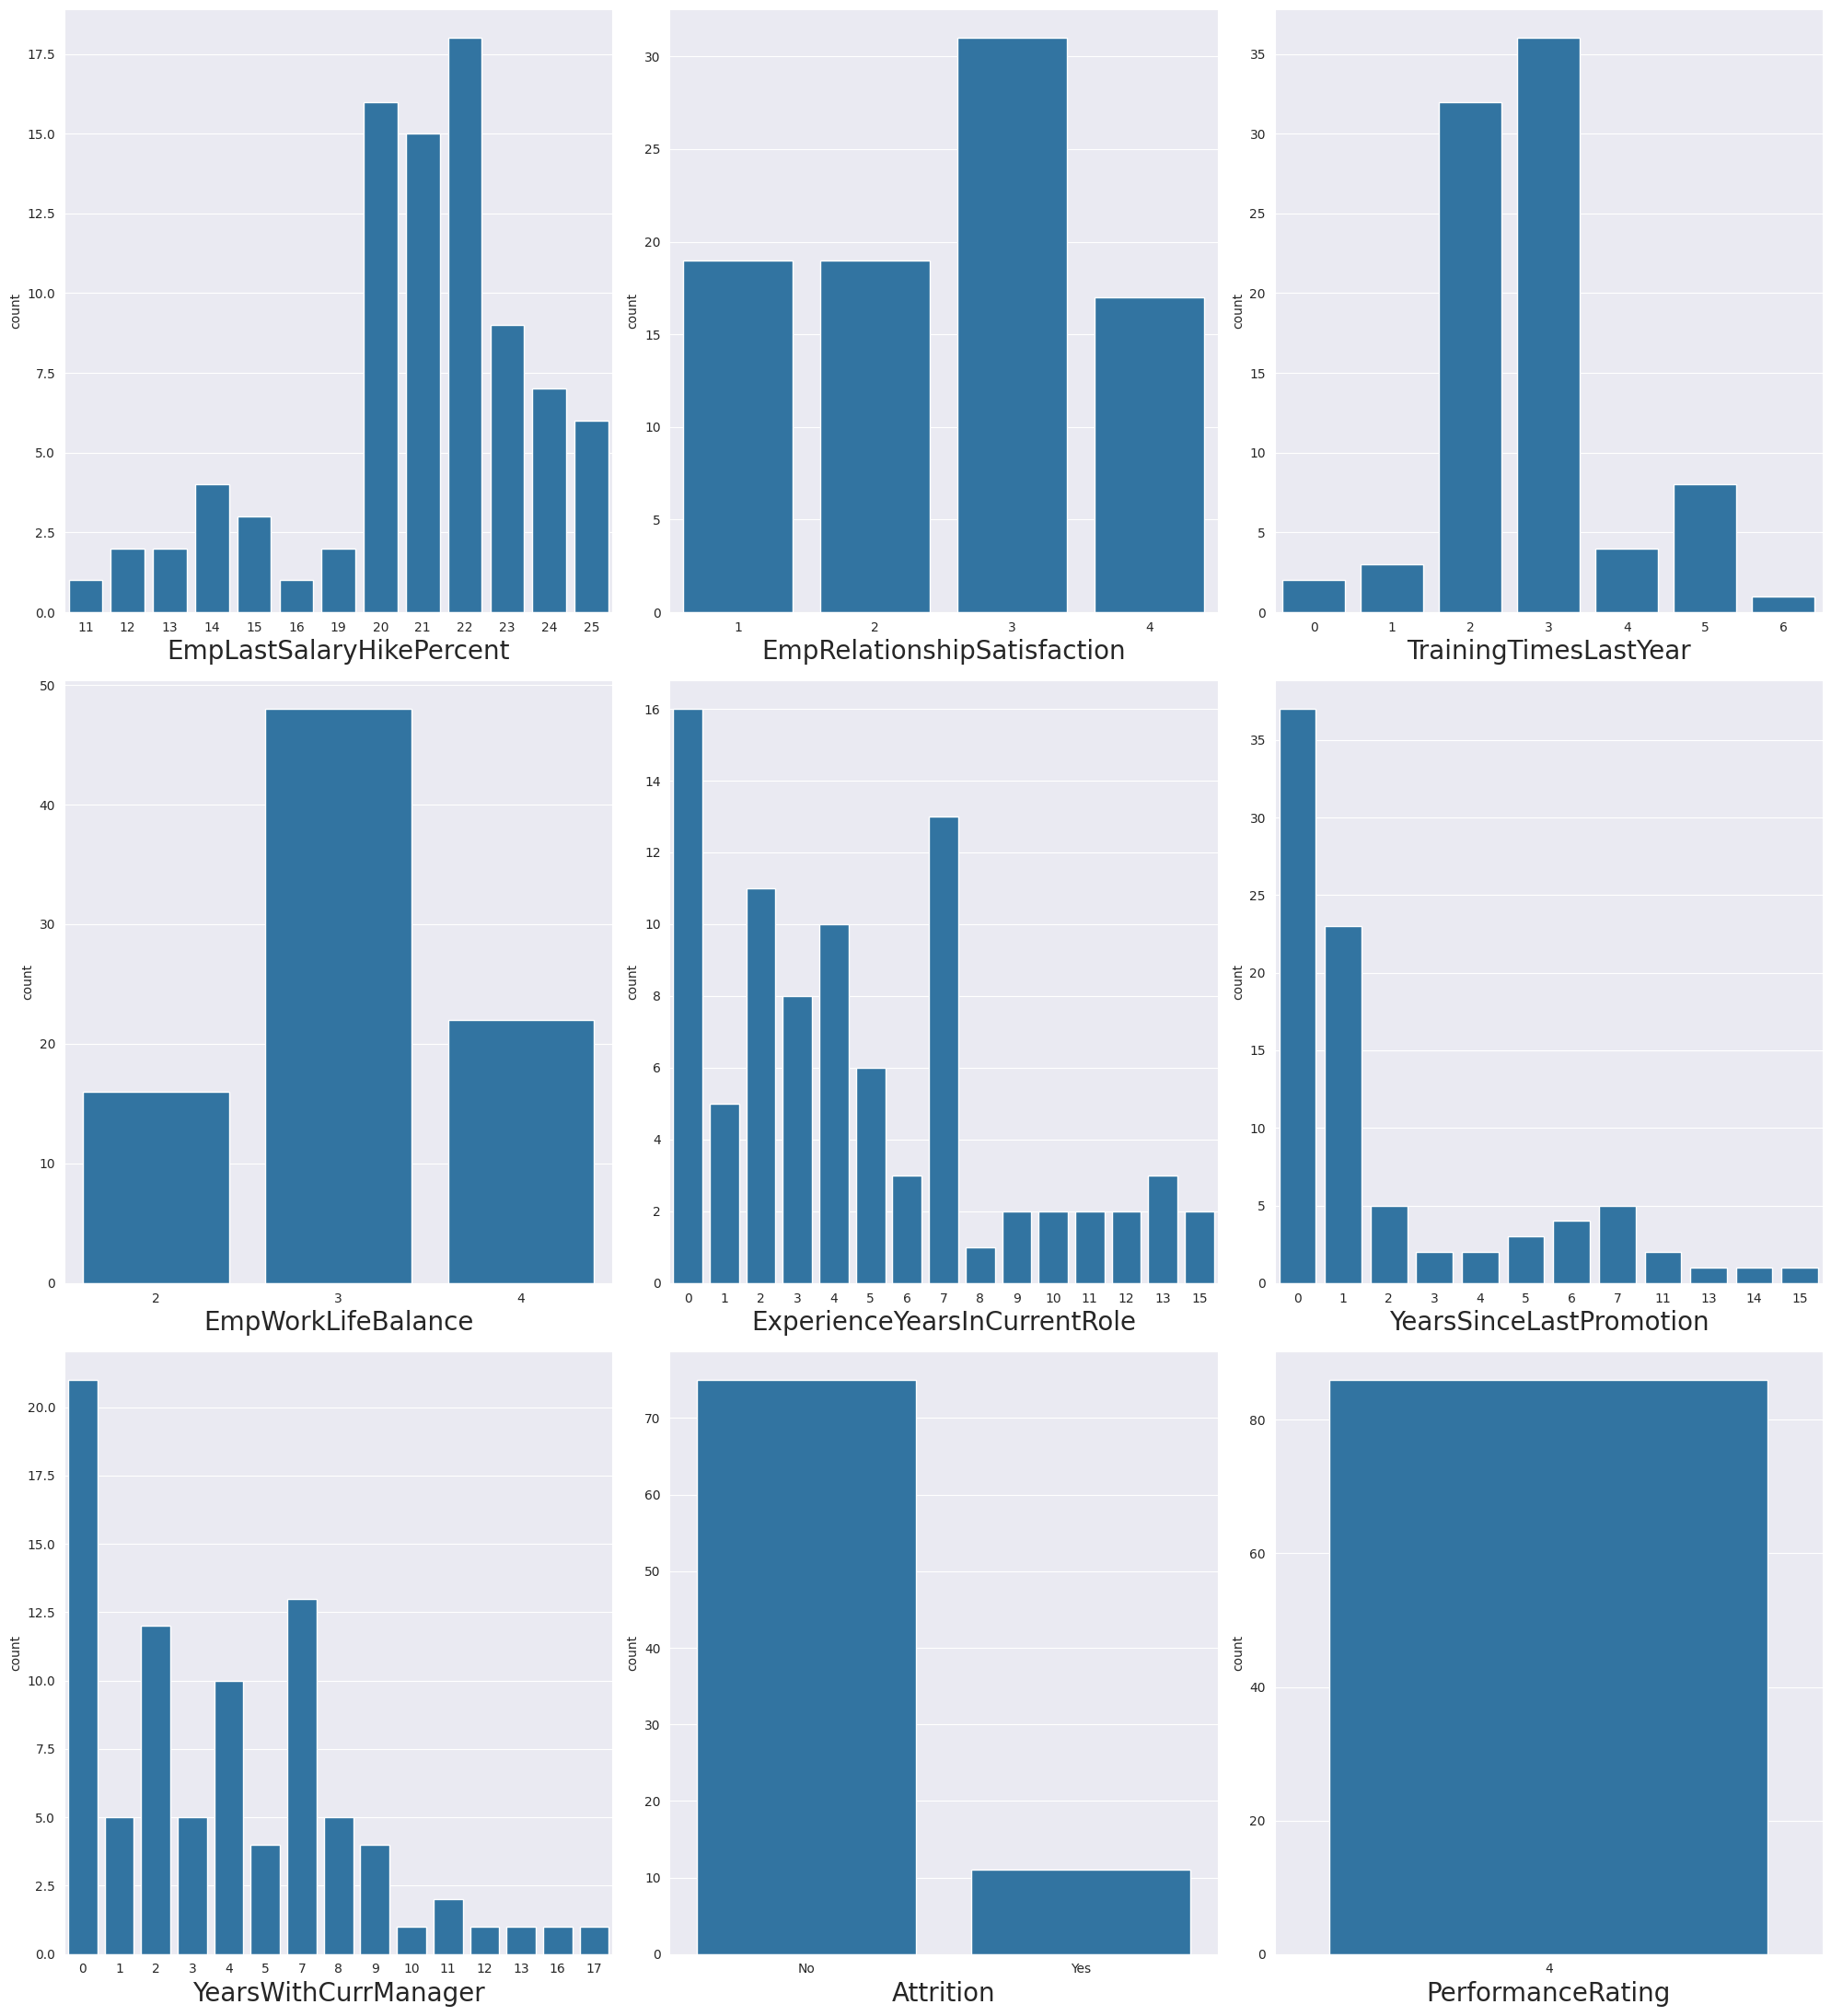

In [ ]:
count2 = data[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition',
               'PerformanceRating']]  #Making nex feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in count2: # iteration of columns / acessing the columns from count
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=count2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

**Observation:**

**17. Employee Last Salary Hike Percent:**

- The majority of employees received a salary hike percentage between 11 to 14%. The total range of salary hike is from 11 to 25%.
- Less than 80 employees received a last salary hike between 15 to 19%.

**18. Employee Relationship Satisfaction:**

- The range of employee relationship satisfaction is 1 to 4. Most of the relationship satisfaction ratings are 3 & 4, with less than 250 employees rating their satisfaction as 1 & 2.

**19. Training Times Last Year:**

- The range of training times in the last year is between 0 to 6.
- Most employees underwent training for the 2nd and 3rd times, while less than 100 employees participated in training for the remaining times.

**20. Employee Work Life Balance:**

- The majority of employees rated their work-life balance as 3, with less than 300 employees rating it as 2.
- The minimum work-life balance rating is 1, and less than 100 employees rated it as 4.

**21. Experience In Current Role:**

- The maximum experience in the current role for an employee is 18 years.
- Most employees have 2 years of experience in their current role, with less than 180 employees having 7 years of experience.
- Less than 200 employees have no experience in their current role.

**22. Years Since Last Promotion:**

- The range of years since the last promotion is from 0 to 15.
- Most employees have not been promoted in the last year, with less than 300 employees having been promoted at least 1 year ago.

**23. Years With Current Manager:**

- Most employees have spent 2 years with their current manager, with a minimum of 16 years.
- The range is between 0 to 17 years, and less than 180 employees have spent 7 years with their current manager.

**24. Attrition:**

- The maximum number of employees has not left the company, while less than 200 employees are going to leave.

**25. Target Feature == Performance Rating:**

- The range of performance ratings is from 2 to 4, with most employees having a rating of 3, and fewer employees having a rating of 4.
- Less than 200 employees have a performance rating of 2.

**26. Employee Department:**

- [Please provide the data for this section following the format of the previous observations.]

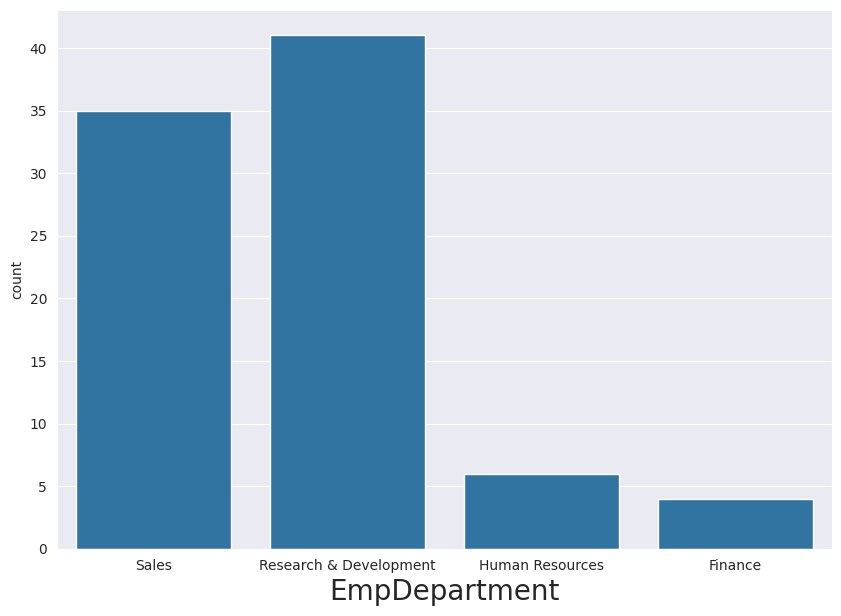

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='EmpDepartment',data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.show()

Observation:

1. **Sales Department:** The Sales department has the highest number of employees, with less than 320 individuals.

2. **Development and Research & Development (R&D) Departments:** Both the Development and R&D departments also have a significant number of employees, comparable to or slightly less than the Sales department.

3. **Human Resources (HR) & Finance Departments:** The HR and Finance departments have approximately equal numbers of employees, with a count similar to that of the R&D department.

4. **Data Science Department:** The Data Science department has the fewest employees among all departments, indicating it may be a smaller team within the company compared to other departments.

**27.Employee Job Role**

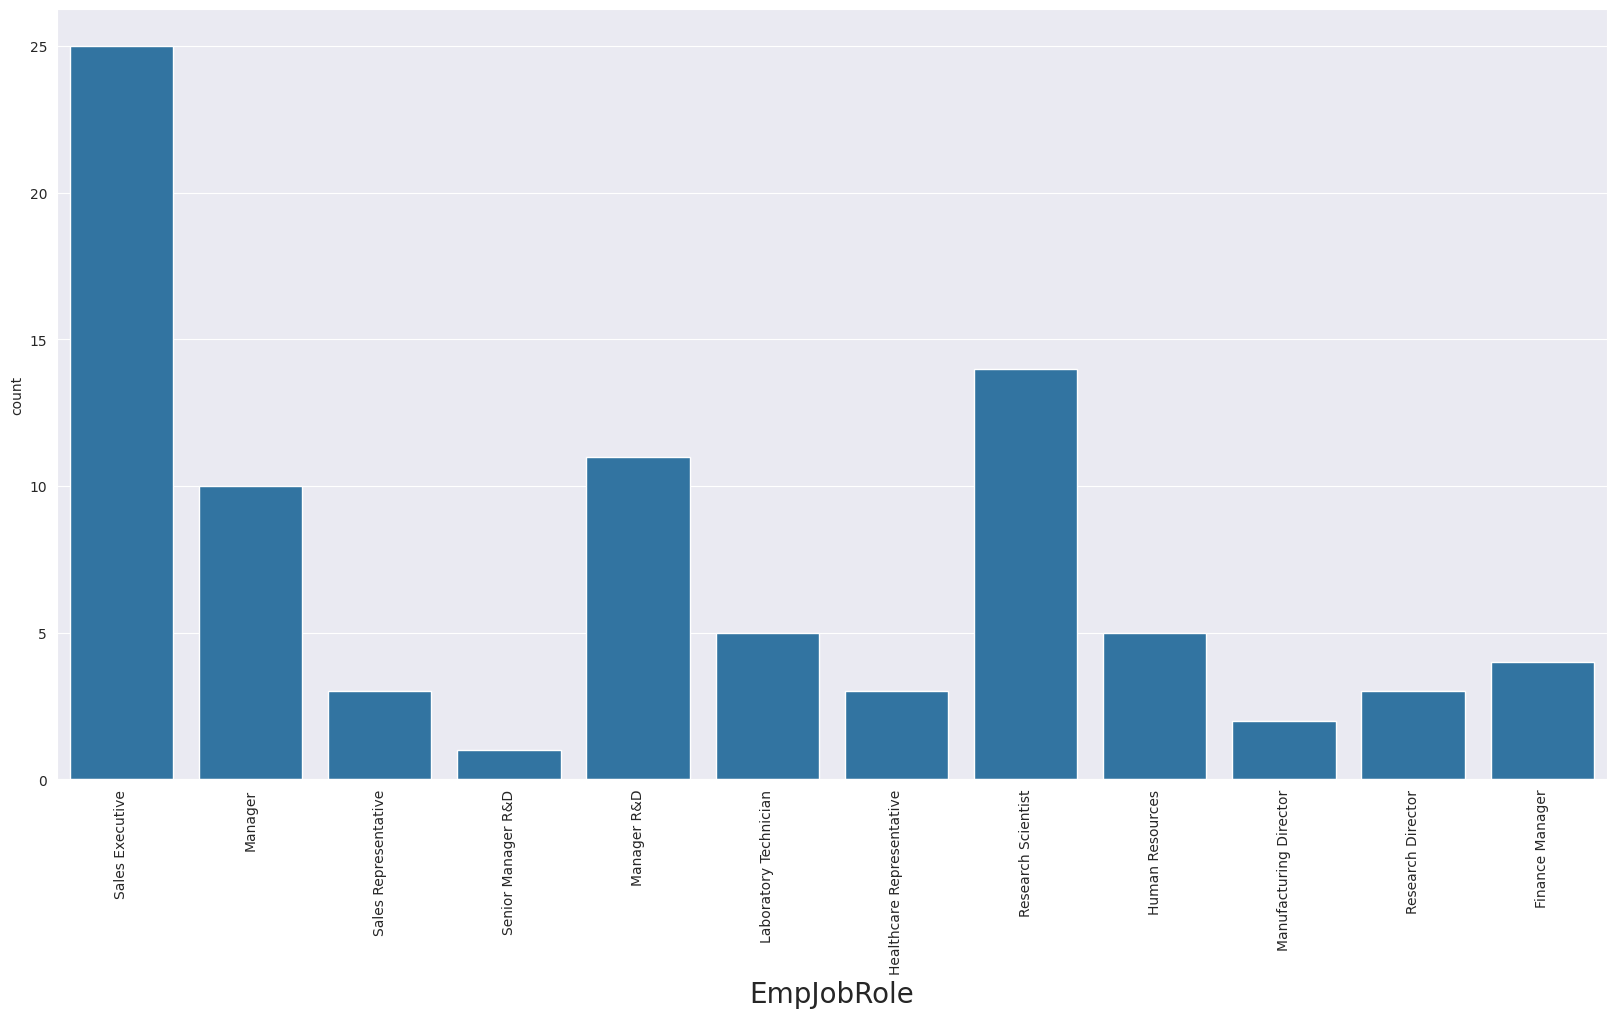

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='EmpJobRole',data=data)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.show()

**BIAVARIATE ANALYSIS**

**1.Relation Between age & Experience Years At This Company**

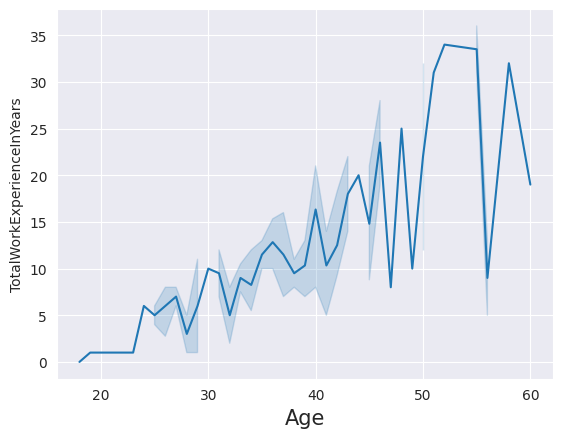

In [ ]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=15)
plt.show()

**Observation:**

* If the age in between 18 to 25 then the total year of experiance is less than 5year.
-If the age is increases that time experiance also increases.

**2.Relation Between experiance year at this company & total work experiance**

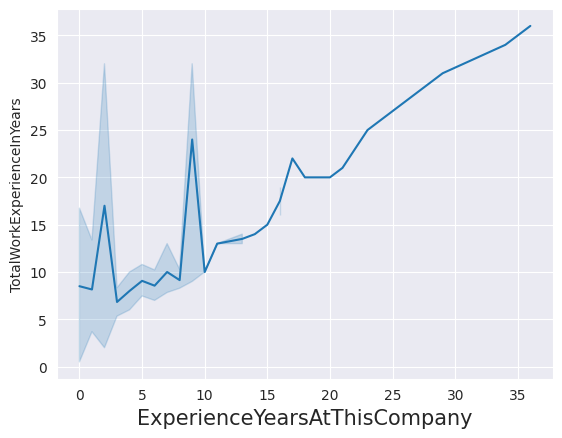

In [ ]:
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=15)
plt.show()

**Observation:**

- If he experiance year at this company that time total work experiance also increases.


**3.Relation between Employee last salary hike and number of company worked**

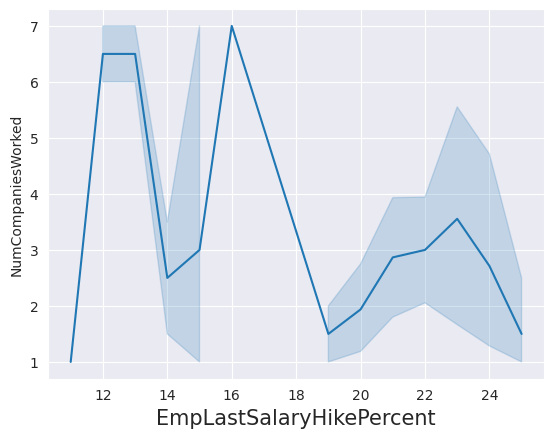

In [ ]:
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

**Observation:**

- If the employee has work 1 or 2 company that time employee last salary hike percent is increases

**4.Relation between Years Since Last Promotion and Experience Years In CurrentRole**

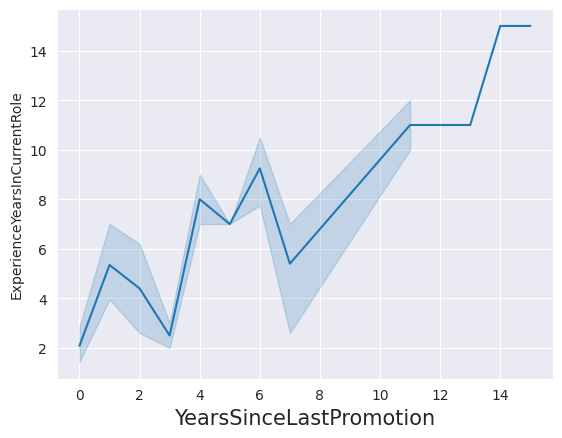

In [ ]:
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=15)
plt.show()

**Observation:**

- In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

**5.Relation between Employee Hourly Rate and Years With Current Manager**

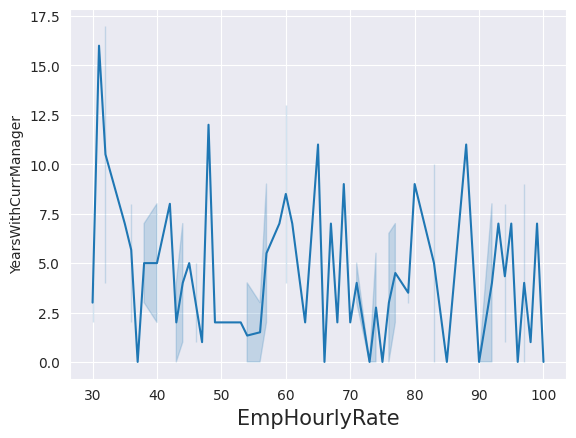

In [ ]:
sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=15)
plt.show()

**Observation:**

- most of the employee hourly rate with their current manager is constant,but some of the employees has maximum hourly rate with less no of year with current manager.

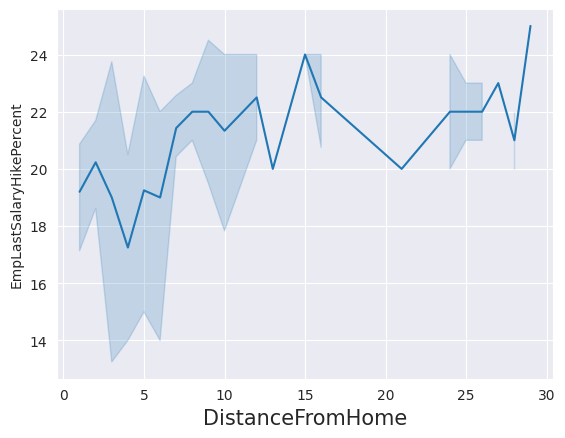

In [ ]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=15)
plt.show()